# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
# -- 1 --
df = pd.read_csv('/Users/Daria/Documents/UVA/Foundations_of_ML/linearRegression/ds3001-linearRegression/04_hedonic_pricing/cars_hw.csv')
df = df.loc[:,['Make','Make_Year','Mileage_Run','Price'] ]
df.head()

,Make,Make_Year,Mileage_Run,Price
0,Volkswagen,2017,44611,657000
1,Hyundai,2016,20305,682000
2,Honda,2019,29540,793000
3,Renault,2017,35680,414000
4,Hyundai,2017,25126,515000


In [86]:
print(df.shape)
print(df.describe())
df.head()
df_og = df

(976, 4)
         Make_Year   Mileage_Run         Price
count   976.000000    976.000000  9.760000e+02
mean   2016.963115  41571.195697  7.410195e+05
std       2.818742  24390.995134  3.673234e+05
min    2011.000000   1117.000000  1.880000e+05
25%    2015.000000  22676.750000  4.757500e+05
50%    2017.000000  37570.500000  6.665000e+05
75%    2019.000000  57421.250000  8.830000e+05
max    2022.000000  99495.000000  2.941000e+06


In [87]:
price = df['Price']
price.unique()

array([ 657000,  682000,  793000,  414000,  515000,  604000,  316000,
       1419000,  710000,  392000,  613000,  598000,  969000, 2100000,
        666000, 1039000,  858000,  860000,  680000,  625000,  567000,
        371000, 1076000,  587000,  396000,  554000,  984000,  507000,
        586000,  639000,  237000,  536000,  456000, 1107000,  571000,
        629000,  718000,  877000,  774000,  829000,  530000,  367000,
        550000,  660000,  998000, 1012000, 1537000,  908000,  508000,
        417000,  725000,  980000,  796000,  435000,  481000,  442000,
        759000,  455000, 1972000, 1138000,  920000, 1742000,  568000,
        419000,  476000,  577000,  541000,  730000, 1875000,  622000,
        937000,  609000,  412000,  638000,  807000,  590000,  651000,
        694000, 1364000,  783000,  628000,  885000,  724000,  470000,
       1085000,  620000,  659000,  953000, 1173000,  457000,  461000,
        471000,  902000,  791000,  506000,  594000,  362000,  914000,
        544000,  513

In [90]:
# price = price.str.replace(",", "")
# print(price.unique(), "\n")
# price = pd.to_numeric(price, errors="coerce")
# print(price.unique(), "\n")
print("Missing vals:", sum(price.isnull()))

Missing vals: 0


<Axes: ylabel='Price'>

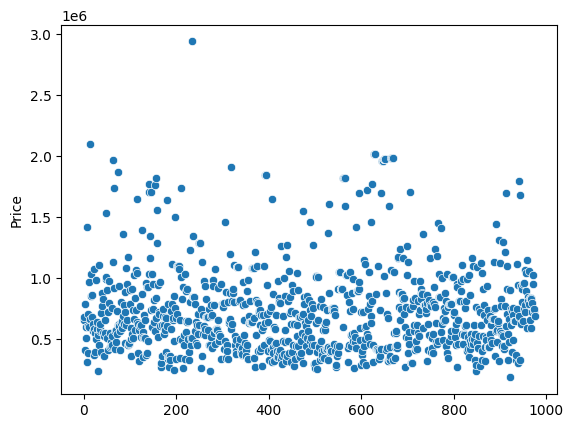

In [91]:
sns.scatterplot(price)

<Axes: ylabel='Price'>

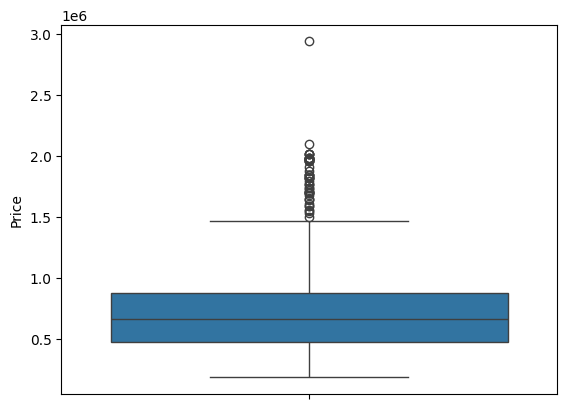

In [92]:
sns.boxplot(price)

In [95]:
reviews = df['Make_Year']
reviews.unique()

array([2017, 2016, 2019, 2012, 2021, 2020, 2013, 2022, 2018, 2014, 2011,
       2015])

In [96]:
# reviews = reviews.str.replace(",", "")
# print(reviews.unique(), "\n")
# reviews = pd.to_numeric(reviews, errors="coerce")
# print(reviews.unique(), "\n")
print("Missing vals:", sum(reviews.isnull()))

Missing vals: 0


<Axes: xlabel='Make_Year', ylabel='Count'>

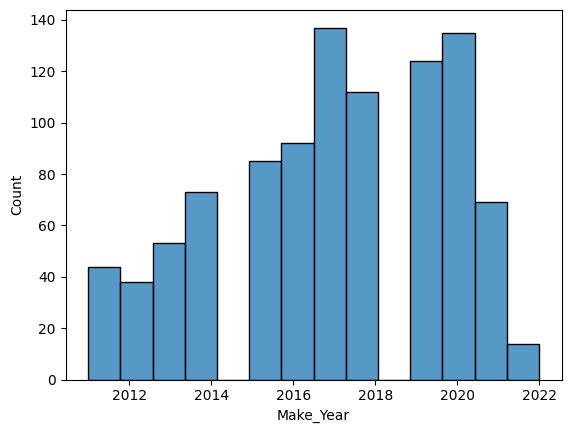

In [97]:
sns.histplot(reviews)

<Axes: xlabel='Make_Year', ylabel='Price'>

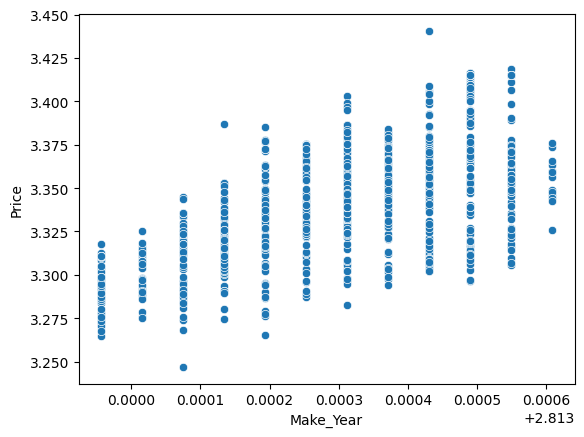

In [108]:
# -- 2 --
df['Price'] = pd.to_numeric(df['Price'], errors="coerce")
df['Make_Year'] = pd.to_numeric(df['Make_Year'], errors="coerce")

df['Price_arcsin'] = np.arcsinh(df['Price'])
df['Make_Year_arcsin'] = np.arcsinh(df['Make_Year'])
df['Mileage_Run_arcsin'] = np.arcsinh(df['Mileage_Run'])
sns.scatterplot(data=df,y='Price',x='Make_Year')

In [127]:
# -- 3 --
vars = ['Make_Year','Mileage_Run'] # This is a list of variables to use
X = df.loc[:,vars]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

In [128]:
X.head()

,Make_Year,Mileage_Run
0,2.813313,44611
1,2.813253,20305
2,2.813431,29540
3,2.813313,35680
4,2.813313,25126


In [130]:
# -- 4 --
reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)
residual = (y_test - prediction)
print(residual)

print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

641    0.004889
692    0.002751
222    0.006753
826   -0.007500
901   -0.012041
         ...   
25     0.016709
390   -0.015075
685    0.005209
205    0.027904
184   -0.054762
Name: Price, Length: 196, dtype: float64
-393.58837835996763
[1.41084537e+02 3.32089571e-07]
0.4077000576710348


In [131]:
# -- 5 --
vars = ['Make_Year_arcsin','Mileage_Run_arcsin'] # This is a list of variables to use
X = df.loc[:,vars]
y = df['Price_arcsin']

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)
residual = (y_test - prediction)
print(residual)

print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

641    0.001375
692    0.002477
222    0.001513
826   -0.002786
901   -0.003528
         ...   
25     0.004413
390   -0.004926
685    0.000782
205    0.009055
184   -0.015844
Name: Price_arcsin, Length: 196, dtype: float64
-218.5927523887104
[1.25433284e+02 3.59352522e-03]
0.4190400107395551


The second model (in part 5 that used the arcsin transformations) had a higher R^2 value so it seems more accurate.

-- 6 --

Both the transformed and untransformed data models performed similarly. The transformed data had a higher R^2 value meaning that it was more accurate. I had a hard time with this lab. I found it difficult to know what to do with the data and I am not sure if I actually did things correctly.